In [14]:
import networkx as nx
import numpy as np
import requests
import zipfile
from io import BytesIO
import json

In [15]:
with open('../config/political_etl.json') as fh:
    political_etl_config = json.load(fh)

In [16]:
political_etl_config

{'link_dir': 'http://www-personal.umich.edu/~mejn/netdata/polblogs.zip',
 'temp_dir': 'data/political/temp/',
 'data_dir': 'data/political/raw/',
 'raw_data_filename': 'polblogs.gml',
 'temp_pickle_graph_filename': 'political_graph.pickle',
 'ground_truth_filename': 'ground_truth.json'}

In [7]:
## GET LOADED AND UNZIPPED ONLY CODE
link = "http://www-personal.umich.edu/~mejn/netdata/polblogs.zip"
data_dir = "data/political/raw/"

In [8]:
# Split URL to get the file name
filename = link.split('/')[-1]

In [9]:
# Downloading the file by sending the request to the URL
print('Beginning Political Data Download')
req = requests.get(link)
print('Political Data Download Completed')

Beginning Political Data Download
Political Data Download Completed


In [10]:
# extracting the zip file contents
zf= zipfile.ZipFile(BytesIO(req.content))
zf.extractall('../' + data_dir)

In [11]:
#editing file for proper readin

In [17]:
f = open('../' + data_dir + political_etl_config["raw_data_filename"], "r")
contents = f.readlines()
f.close()

In [18]:
contents[:5]

['Creator "Lada Adamic on Tue Aug 15 2006"\n',
 'graph [\n',
 '  directed 1\n',
 '  node [\n',
 '    id 1\n']

In [19]:
missing_line = '  multigraph 1\n'
contents.insert(3, missing_line)
contents[:5]

['Creator "Lada Adamic on Tue Aug 15 2006"\n',
 'graph [\n',
 '  directed 1\n',
 '  multigraph 1\n',
 '  node [\n']

In [21]:

f = open('../' + data_dir + political_etl_config["raw_data_filename"], "w")
contents = "".join(contents)
f.write(contents)
f.close()

In [23]:
H = nx.read_gml('../' + data_dir + political_etl_config["raw_data_filename"])

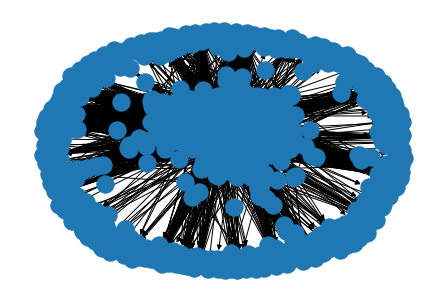

In [24]:
nx.draw(H)

In [25]:
largest = max(nx.strongly_connected_components(H), key=len)

In [26]:
Largest_SCC = H.subgraph(largest)

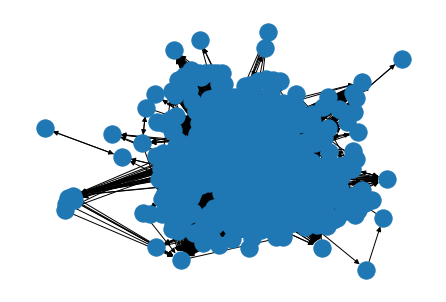

In [28]:
nx.draw(Largest_SCC)

In [109]:
def spectral_cluster(G):
    A = nx.to_numpy_array(G)
    D = np.diag(A.sum(axis=1))
    # graph laplacian
    L = D-A
    # eigenvalues and eigenvectors
    vals, vecs = np.linalg.eig(L)
    # sort these based on the eigenvalues
    vecs = vecs[:,np.argsort(vals)]
    vals = vals[np.argsort(vals)]
    return [1 if i > 0 else 0 for i in vals]

# Try on entire graph

In [127]:
predictions = spectral_cluster(H)

In [134]:
evaluate = []
index = 0
for i in list(H.nodes(data = True)):
    evaluate.append(predictions[index] == i[1]['value'])
    index += 1

In [136]:
sum(evaluate)/len(evaluate)

0.7778523489932886

# Try on strongest connected component

In [142]:
predictions = spectral_cluster(Largest_SCC)

In [143]:
evaluate = []
index = 0
for i in list(Largest_SCC.nodes(data = True)):
    evaluate.append(predictions[index] == i[1]['value'])
    index += 1

In [144]:
sum(evaluate)/len(evaluate)

0.5586380832282472